# Exploring Disaster Tweet Dataset

# Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the Dataset

In [38]:
data_file_path = r'C:\Users\Shubham.G.Gohil\OneDrive\Documents\tweets.csv'
df = pd.read_csv(file_path)
df = pd.read_csv(data_file_path)
print(tweets_df.head())

   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  \
0  Communal violence in Bhainsa, Telangana. "Ston...       1   
1  Telangana: Section 144 has been imposed in Bha...       1   
2  Arsonist sets cars ablaze at dealership https:...       1   
3  Arsonist sets cars ablaze at dealership https:...       1   
4  "Lord Jesus, your love brings freedom and pard...       0   

                                        cleaned_text  
0  communal violence in bhainsa telangana stones ...  
1  telangana section  has been imposed in bhainsa...  
2  arsonist sets cars ablaze at dealership httpst...  
3  arsonist sets cars ablaze at dealership httpst...  
4  lord jesus your love brings freedom and pardon...  


# Understanding the Structure of the Dataset

In [19]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB
None


# Handling Missing Values

In [22]:
print("\nMissing values before cleanup:")
print(df.isnull().sum())


Missing values before cleanup:
id             0
keyword        0
location    3418
text           0
target         0
dtype: int64


In [24]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_text)
tweets_df.head()

,id,keyword,location,text,target,cleaned_text
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence in bhainsa telangana stones ...
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,telangana section has been imposed in bhainsa...
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership httpst...
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership httpst...
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus your love brings freedom and pardon...


# Data Visualization

#### 1. Visualize disaster vs. non-disaster tweet distribution insights

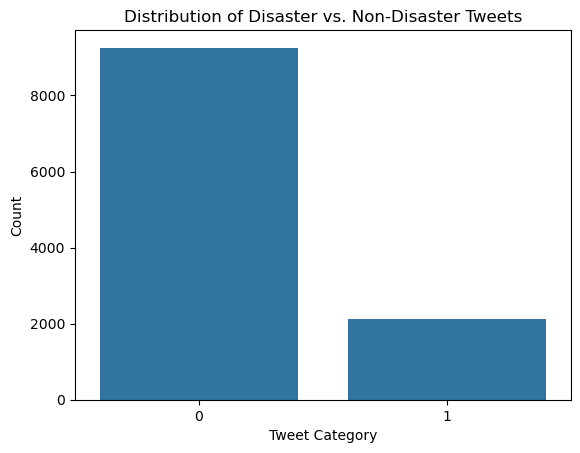

In [54]:
sns.countplot(x='target', data=tweets_df)
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Tweet Category')
plt.ylabel('Count')
plt.show()

#### 2. The dataset is cleaned; now we will tokenize, remove stopwords, and perform lemmatization.

C:\Users\Shubham.G.Gohil\AppData\Local\Temp\ipykernel_18824\2626791863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')


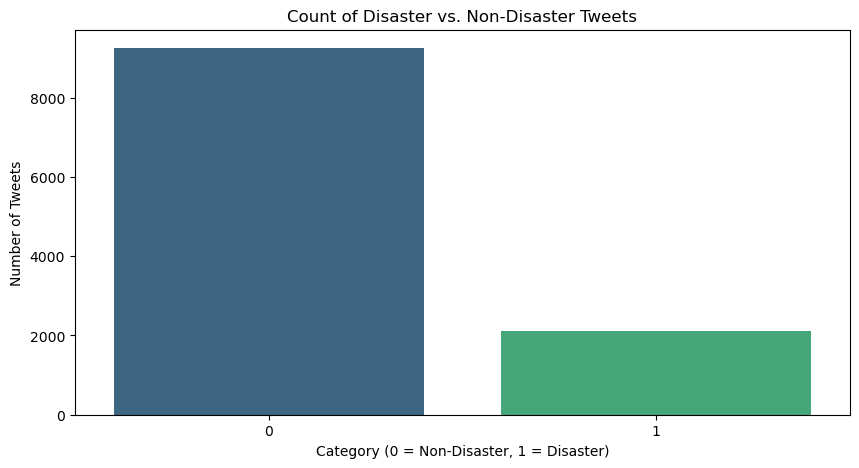

In [57]:
disaster_counts = tweets_df['target'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')
plt.title('Count of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Category (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

# Text Preprocessing 

### 1. Load Libraries and NLTK resources 

In [24]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubham.G.Gohil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham.G.Gohil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shubham.G.Gohil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 2. Load and Display Few rows

In [10]:
file_path = r'C:\Users\Shubham.G.Gohil\OneDrive\Documents\tweets.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the original DataFrame
print("Original DataFrame:")
print(df.head())

# Display the column names to confirm
print("\nColumns in DataFrame:", df.columns.tolist())

Original DataFrame:
   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  

Columns in DataFrame: ['id', 'keyword', 'location', 'text', 'target']


### 3. Clean DataFrame

In [13]:
df_clean = df.dropna(subset=['text'])

### 4. Applied Preprocessing Functions
#####     (1) Lowercasing
#####     (2) Removing URLs
#####     (3) Removing User Mentions and Hashtags (Optional)
#####     (4) Removing Punctuation
#####     (5) Removing Numbers
#####     (6) Tokenizing
#####     (7) Removing stopwords
#####     (8) Lemmatization
#####     (9) Removing extra whitespace

In [19]:
def preprocess_tweet(tweet):
    # Lowercasing
    tweet = tweet.lower()
    
    # Removing URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Removing User Mentions and Hashtags
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    
    # Removing Punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Removing Numbers
    tweet = re.sub(r'\d+', '', tweet)
    
    # Tokenizing
    tokens = word_tokenize(tweet)
    
    # Removing stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Removing extra whitespace
    tweet = ' '.join(tokens)
    
    return tweet

if 'text' in df_clean.columns:  # Check if the column exists
    df_clean['processed_tweet'] = df_clean['text'].apply(preprocess_tweet)

    # Display the cleaned and preprocessed tweets
    print("\nFirst few rows of processed tweets:")
    print(df_clean[['text', 'processed_tweet']].head())
else:
    print("Column 'text' not found in the DataFrame.")


First few rows of processed tweets:
                                                text  \
0  Communal violence in Bhainsa, Telangana. "Ston...   
1  Telangana: Section 144 has been imposed in Bha...   
2  Arsonist sets cars ablaze at dealership https:...   
3  Arsonist sets cars ablaze at dealership https:...   
4  "Lord Jesus, your love brings freedom and pard...   

                                     processed_tweet  
0  communal violence bhainsa telangana stone pelt...  
1  telangana section imposed bhainsa january clas...  
2                 arsonist set car ablaze dealership  
3                 arsonist set car ablaze dealership  
4  lord jesus love brings freedom pardon fill hol...  


# Conclusion

### Common Keywords in Tweets

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham.G.Gohil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Shubham.G.Gohil\AppData\Local\Temp\ipykernel_10292\658109109.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


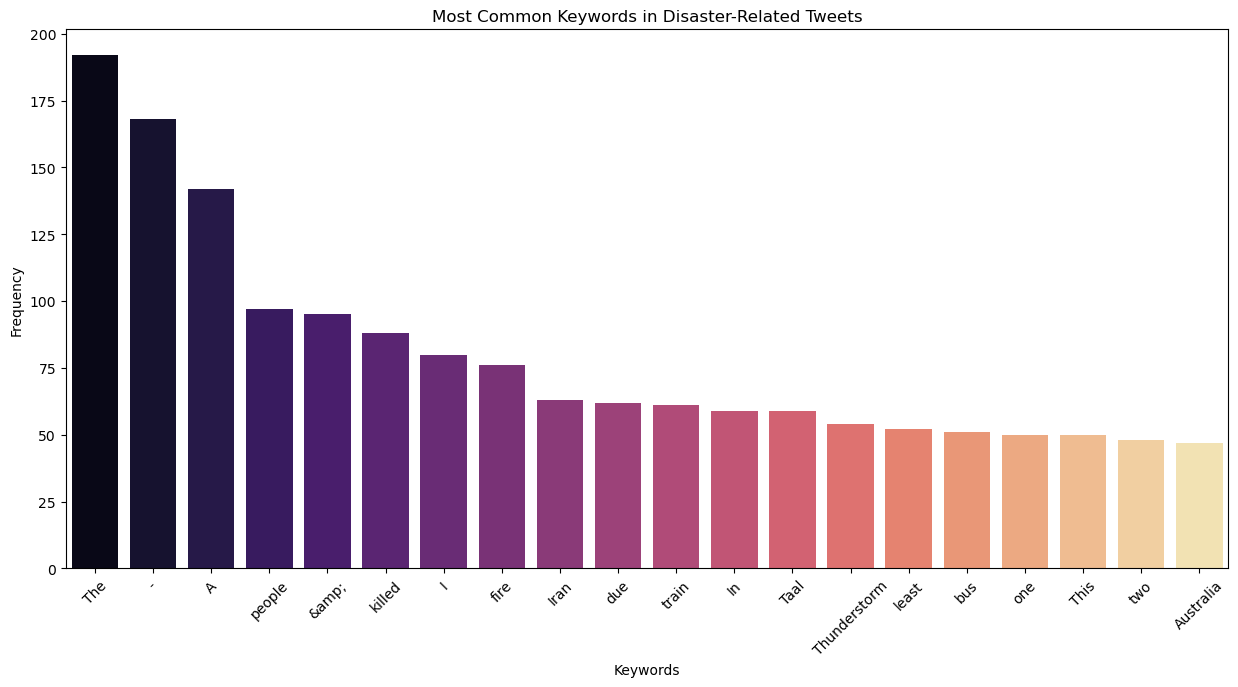

In [48]:
# Finding the most common keywords in disaster-related tweets
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
disaster_tweets = df[df['target'] == 1]['text']
all_words = ' '.join(disaster_tweets).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plotting the most common keywords
words, counts = zip(*common_words)
plt.figure(figsize=(15, 7))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title('Most Common Keywords in Disaster-Related Tweets')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()